# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
garisKemiskinan_df = pd.read_csv("dataset_clustering/garisKemiskinan.csv", delimiter=",")
garisKemiskinan_df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [4]:
rataRataUpah_df = pd.read_csv("dataset_clustering/rataRataUpah.csv", delimiter=",")
rataRataUpah_df.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [5]:
pengeluaran_df = pd.read_csv("dataset_clustering/pengeluaran.csv", delimiter=",")
pengeluaran_df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [6]:
minUpah_df = pd.read_csv("dataset_clustering/minUpah.csv", delimiter=",")
minUpah_df.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
def analisis_data(df):
    print(df.info())
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data Kosong : \n\n{df.isna().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data ganda  : {df.duplicated().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(df.describe)

In [8]:
analisis_data(garisKemiskinan_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi    jenis              daerah  tahun    periode        gk
0          ACEH  MA

In [9]:
analisis_data(minUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi     0
tahun        0
ump         24
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun        ump
0         ACEH   2002   330000.0
1         ACEH   2003   425000.0
2         ACEH   2004   550000.0
3         ACEH   2005   620000.0
4         ACEH   2006   820000.0
..         ...    ...        ...
730  INDONESIA   2018  2268874.0

In [10]:
analisis_data(pengeluaran_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi              daerah    jenis  tahun       peng
0          ACEH           PERDESAAN  MAKANAN   2007   195176.0
1          ACEH      

In [11]:
analisis_data(rataRataUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi    0
tahun       0
upah        0
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun   upah
0         ACEH   2015  11226
1         ACEH   2016  13627
2         ACEH   2017  14809
3         ACEH   2018  13814
4         ACEH   2019  15065
..         ...    ...    ...
275  INDONESIA   2018  15275
276  INDONESIA   2019  15823
277  INDONESIA   2020  

In [12]:
def visualisasi_EDA(df, title):
    plt.title(label=title)
    plt.hist(df, bins=25)
    plt.show()

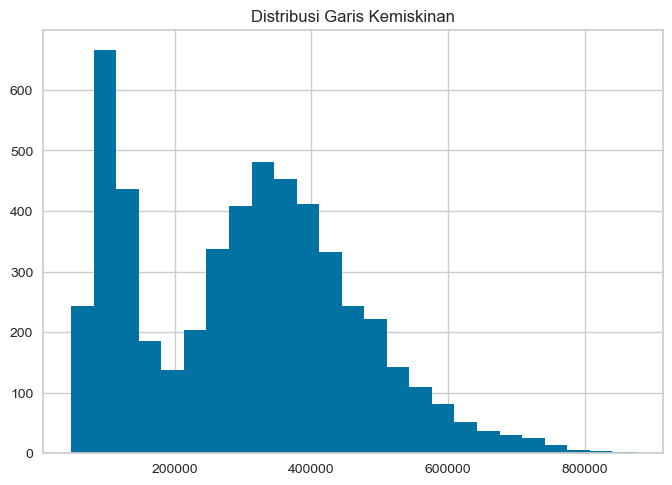

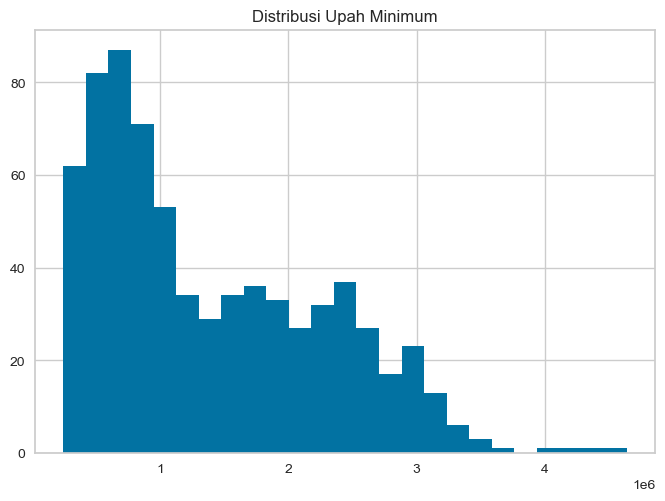

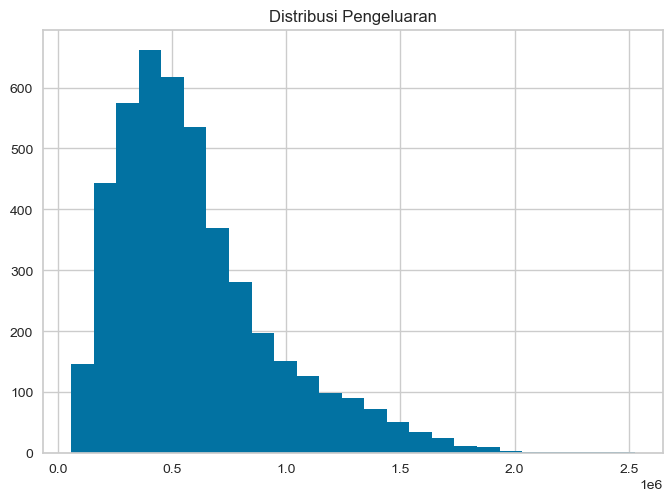

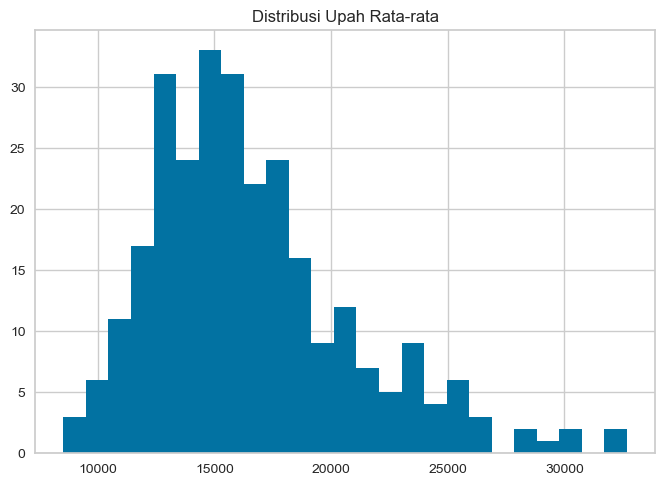

In [13]:
visualisasi_EDA(garisKemiskinan_df["gk"], "Distribusi Garis Kemiskinan")
visualisasi_EDA(minUpah_df["ump"], "Distribusi Upah Minimum")
visualisasi_EDA(pengeluaran_df["peng"], "Distribusi Pengeluaran")
visualisasi_EDA(rataRataUpah_df["upah"], "Distribusi Upah Rata-rata")

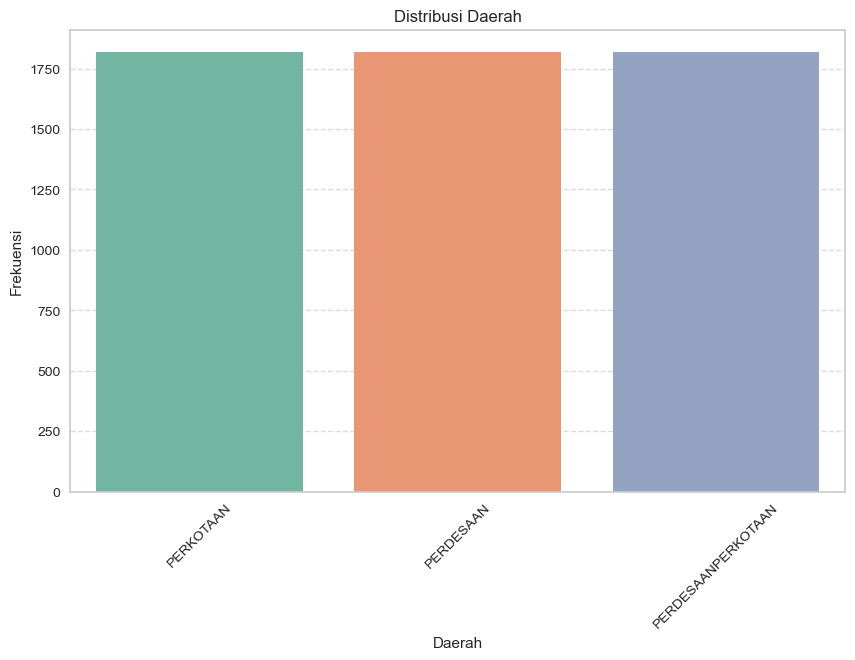

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='daerah', data=garisKemiskinan_df, palette='Set2')
plt.title('Distribusi Daerah')
plt.xlabel('Daerah')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

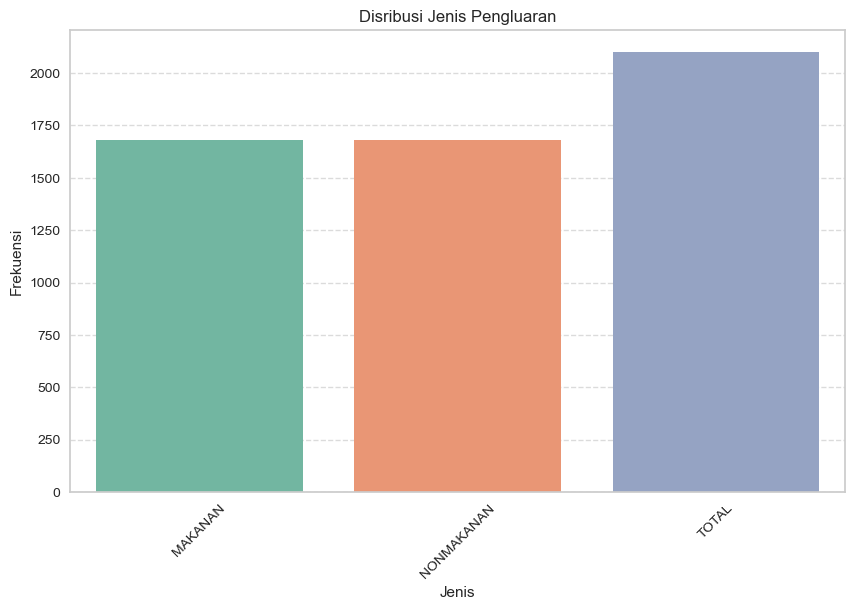

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='jenis', data=garisKemiskinan_df, palette='Set2')
plt.title('Disribusi Jenis Pengluaran')
plt.xlabel('Jenis')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
def fill_missing(df, col):
    print("---------------------------------------------------------")
    print(f"data sebelumnya : {len(df)}")
    df[col].fillna(value=df[col].mean(), inplace=True)
    print(f"Data kosong di {col} :\n{df.isna().sum()}\n")
    print(f"data setelahnya : {len(df)}\n")
    print("---------------------------------------------------------")

In [17]:
fill_missing(garisKemiskinan_df, "gk")
fill_missing(minUpah_df, "ump")
fill_missing(pengeluaran_df, "peng")
fill_missing(rataRataUpah_df, "upah")

---------------------------------------------------------
data sebelumnya : 5460
Data kosong di gk :
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

data setelahnya : 5460

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 735
Data kosong di ump :
provinsi    0
tahun       0
ump         0
dtype: int64

data setelahnya : 735

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 4620
Data kosong di peng :
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

data setelahnya : 4620

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 280
Data kosong di upah :
provinsi    0
tahun       0
upah        0
dtype: int64

data setelahnya : 280

-------------------------------

In [18]:
def visualisasi_outlier(df, col):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[[col]])
    plt.show()

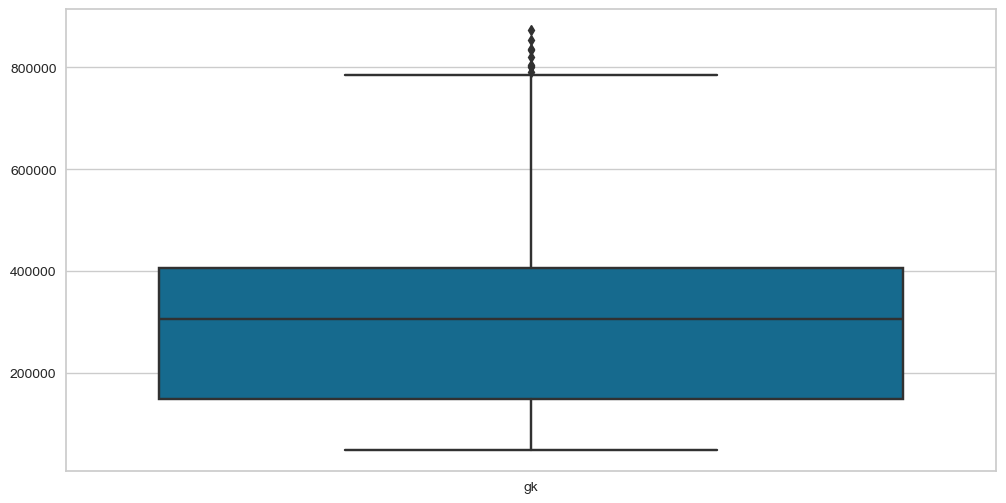

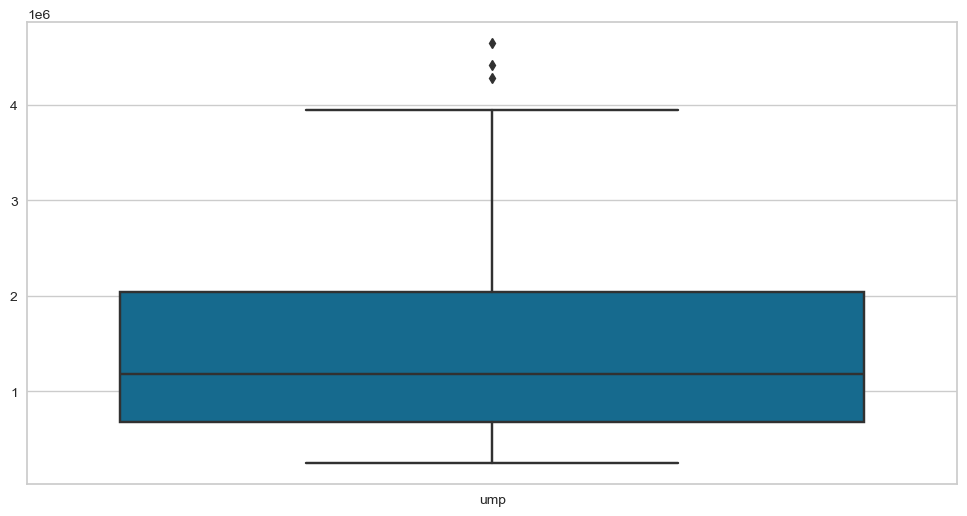

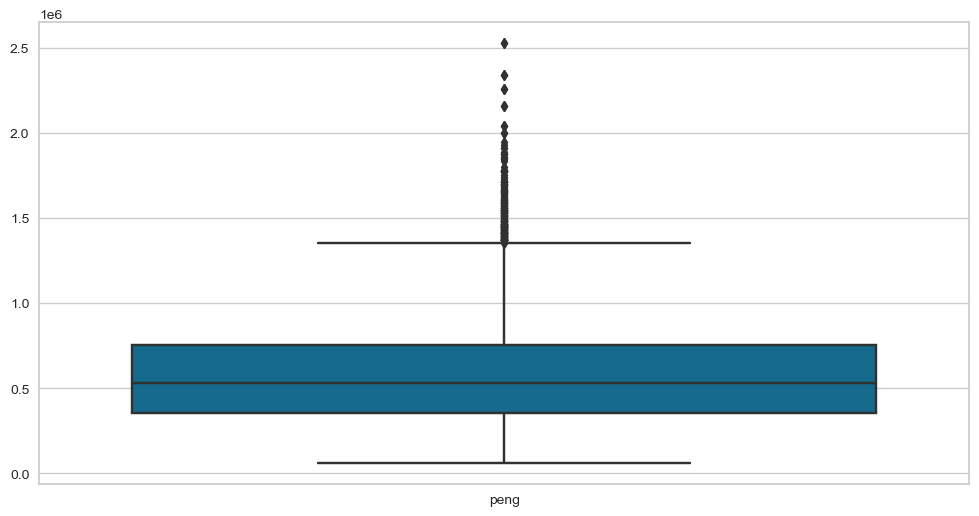

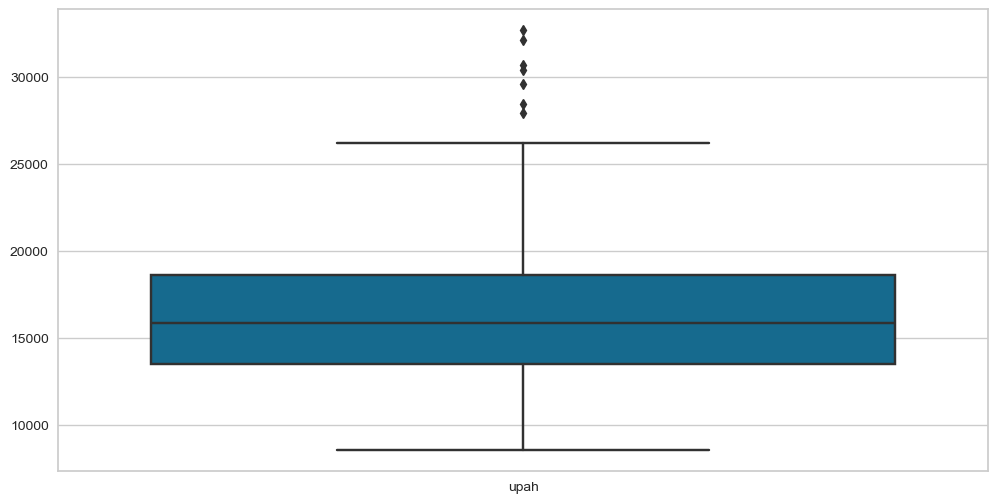

In [19]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [20]:
def handle_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    return df  

In [21]:
garisKemiskinan_df = handle_outlier(garisKemiskinan_df, "gk")
minUpah_df = handle_outlier(minUpah_df, "ump")
pengeluaran_df = handle_outlier(pengeluaran_df, "peng")
rataRataUpah_df = handle_outlier(rataRataUpah_df, "upah")

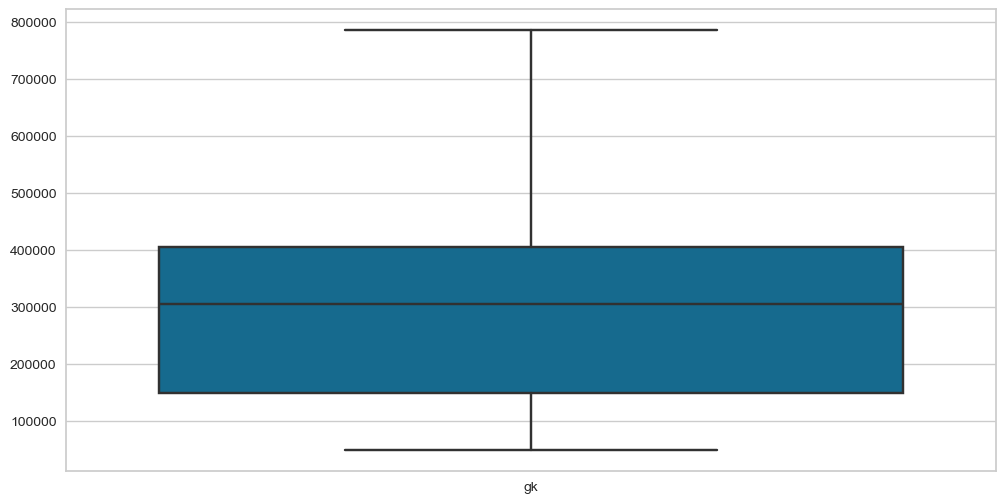

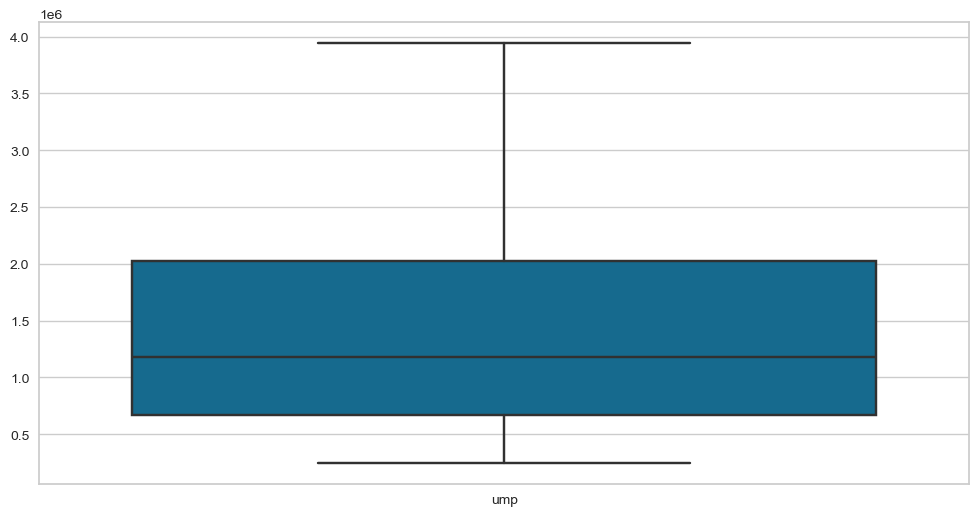

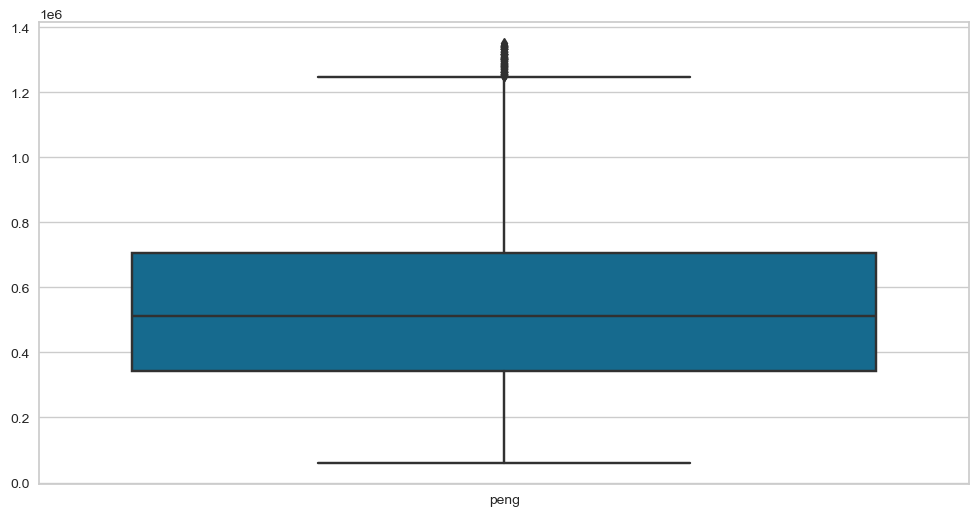

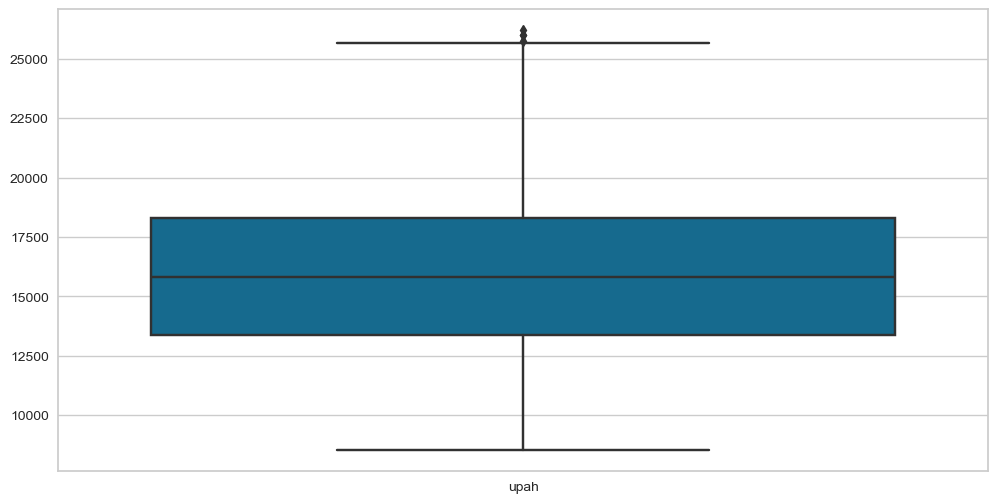

In [22]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [23]:
merged_df = garisKemiskinan_df.merge(pengeluaran_df, on=["provinsi","tahun","daerah","jenis"], how="inner") 

print(merged_df.head())

  provinsi    jenis     daerah  tahun    periode        gk      peng
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0  466355.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0  466355.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0  548853.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0  548853.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0  395136.0


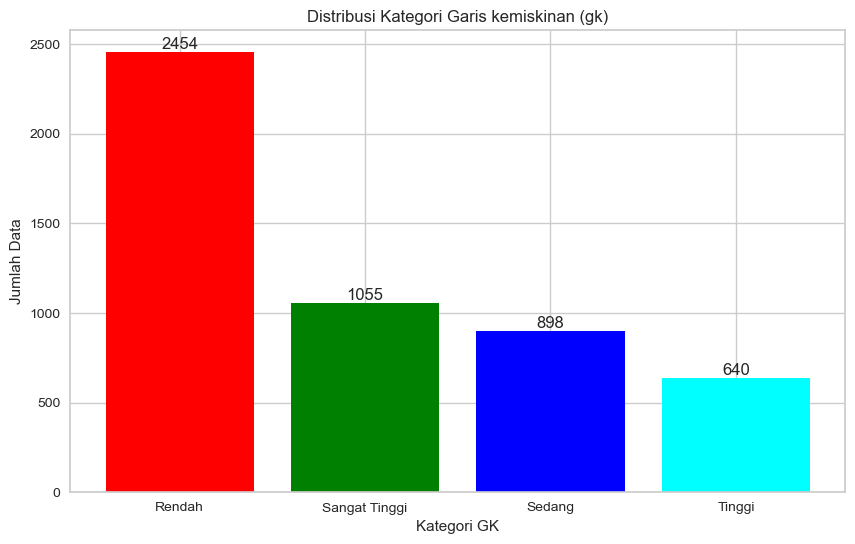

In [24]:
bins = [0, 300000, 350000, 400000, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

merged_df['gk_category'] = pd.cut(merged_df['gk'], bins=bins, labels=labels, right=False)

gk_counts = merged_df['gk_category'].value_counts()

x = gk_counts.index
y = gk_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan'])
plt.title("Distribusi Kategori Garis kemiskinan (gk)")
plt.xlabel("Kategori GK")
plt.ylabel("Jumlah Data")

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [25]:
filtered_df = merged_df[
     (merged_df['jenis'] != 'TOTAL')
]

print(f"Jumlah Baris setelah filter : {len(filtered_df)}")

Jumlah Baris setelah filter : 3352


In [26]:
filtered_df['poverty_to_expense_ratio'] = filtered_df['gk'] / filtered_df['peng']

C:\Users\rizki\AppData\Local\Temp\ipykernel_8440\572541709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['poverty_to_expense_ratio'] = filtered_df['gk'] / filtered_df['peng']


In [27]:
numeric_feature = ["gk", "peng", "poverty_to_expense_ratio"] 
category_feature = ["daerah", "jenis"]

In [28]:
X_num = filtered_df[numeric_feature]
X_cat = filtered_df[category_feature]

In [29]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=numeric_feature)

In [30]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = one_hot_encoder.fit_transform(X_cat)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=one_hot_encoder.get_feature_names_out(category_feature))
X_final = pd.concat([X_num_scaled_df, X_cat_encoded_df], axis=1).reset_index(drop=True)

print(X_final.head())


         gk      peng  poverty_to_expense_ratio  daerah_PERDESAAN  \
0  0.413212  0.255283                  0.576744               0.0   
1  0.427424  0.255283                  0.596813               0.0   
2  0.434360  0.327823                  0.497034               0.0   
3  0.457159  0.327823                  0.524390               0.0   
4  0.419587  0.192660                  0.713379               1.0   

   daerah_PERDESAANPERKOTAAN  daerah_PERKOTAAN  jenis_MAKANAN  \
0                        0.0               1.0            1.0   
1                        0.0               1.0            1.0   
2                        0.0               1.0            1.0   
3                        0.0               1.0            1.0   
4                        0.0               0.0            1.0   

   jenis_NONMAKANAN  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [31]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans.fit(X_final)  
labels = kmeans.labels_
k = 6

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

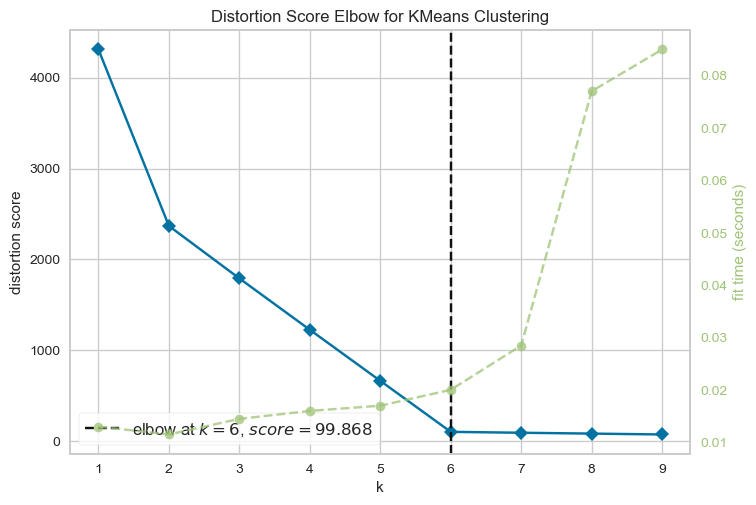

In [32]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_final)
visualizer.show()

optimal_clusters = visualizer.elbow_value_

In [33]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X_final)
silhouette_avg = silhouette_score(X_final, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.858


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [34]:
filter_selector = SelectKBest(score_func=chi2, k=7)  
X_selected = filter_selector.fit_transform(X_final, labels)  

selected_features = filter_selector.get_support(indices=True)
selected_feature_names = X_final.columns[selected_features]
print("Nama fitur yang dipilih:", selected_feature_names.tolist())


Nama fitur yang dipilih: ['gk', 'poverty_to_expense_ratio', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN', 'jenis_MAKANAN', 'jenis_NONMAKANAN']


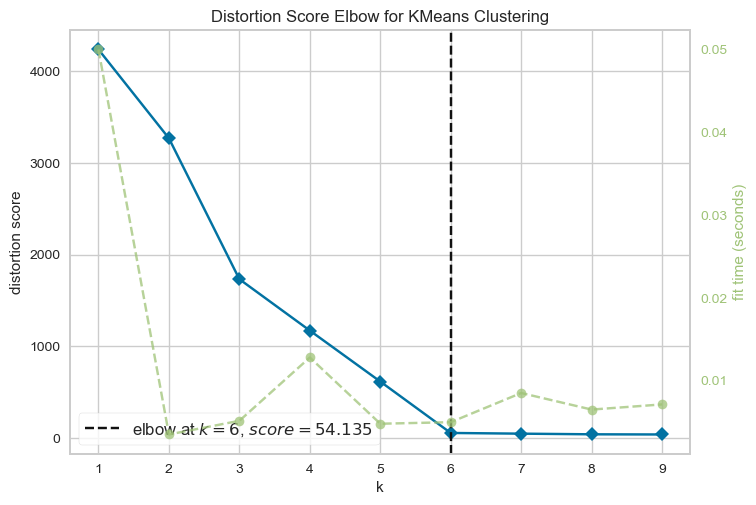

In [35]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_selected)
visualizer.show()

optimal_clusters = visualizer.elbow_value_

In [36]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X_selected)
silhouette_avg = silhouette_score(X_selected, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.899


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

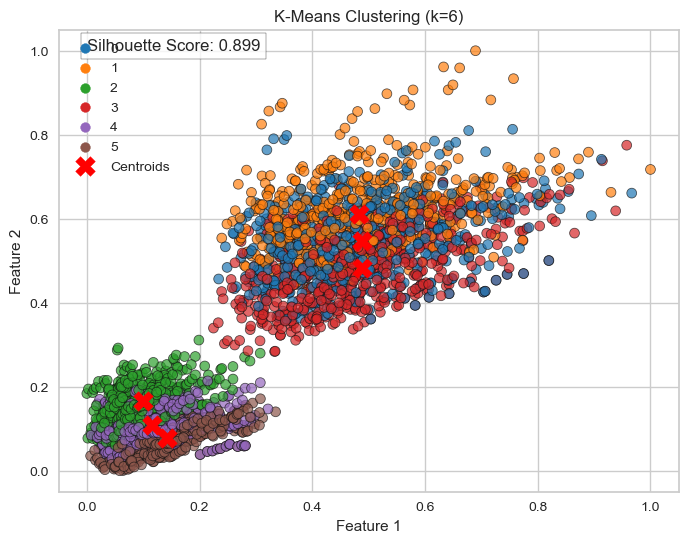

In [37]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_selected[:, 0], y=X_selected[:, 1], hue=labels, palette="tab10", s=50, alpha=0.7, edgecolor="k")

plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroids")

plt.text(min(X_selected[:, 0]), max(X_selected[:, 1]), f"Silhouette Score: {silhouette_avg:.3f}",
         fontsize=12, bbox=dict(facecolor="white", alpha=0.8))

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering (k={optimal_clusters})")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Memasukkan kolom cluster ke dataframe

In [38]:
X_final['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [39]:
encoded_columns = one_hot_encoder.get_feature_names_out(category_feature)
X_final[category_feature] = one_hot_encoder.inverse_transform(X_final[encoded_columns])
X_final = X_final.drop(columns=one_hot_encoder.get_feature_names_out(category_feature))

print(X_final.head())


         gk      peng  poverty_to_expense_ratio  Cluster     daerah    jenis
0  0.413212  0.255283                  0.576744        1  PERKOTAAN  MAKANAN
1  0.427424  0.255283                  0.596813        1  PERKOTAAN  MAKANAN
2  0.434360  0.327823                  0.497034        1  PERKOTAAN  MAKANAN
3  0.457159  0.327823                  0.524390        1  PERKOTAAN  MAKANAN
4  0.419587  0.192660                  0.713379        5  PERDESAAN  MAKANAN


In [40]:
X_final[numeric_feature] = scaler.inverse_transform(X_final[numeric_feature])
print(X_final.head())

         gk      peng  poverty_to_expense_ratio  Cluster     daerah    jenis
0  293697.0  466355.0                  0.629771        1  PERKOTAAN  MAKANAN
1  302128.0  466355.0                  0.647850        1  PERKOTAAN  MAKANAN
2  306243.0  548853.0                  0.557969        1  PERKOTAAN  MAKANAN
3  319768.0  548853.0                  0.582611        1  PERKOTAAN  MAKANAN
4  297479.0  395136.0                  0.752852        5  PERDESAAN  MAKANAN


In [41]:
final_df = X_final.copy() 

### nilai mean dari kolom numerikal dan nilai modus pada kolom kategorikal pada masing-masing cluster.

In [42]:
cluster_summary = X_final.groupby('Cluster').agg({
    'gk': ['min', 'max', 'mean'],
    'peng': ['min', 'max', 'mean'],
    'poverty_to_expense_ratio': ['min', 'max', 'mean'],
    'daerah': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'jenis': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
})

print("Ringkasan Statistik per Cluster:")
print(cluster_summary)


Ringkasan Statistik per Cluster:
               gk                                    peng             \
              min            max           mean       min        max   
Cluster                                                                
0        187304.0  622068.000000  338008.525000  298180.0   953320.0   
1        181842.0  616790.000000  338483.560714  350517.0   953320.0   
2         53095.0  239224.000000  116811.008993  235710.0  1313304.0   
3         48561.0  303904.185516  107320.071372  176028.0   711736.0   
4         52529.0  247232.000000  132901.758993  369746.0  1313304.0   
5        190563.0  641806.000000  335024.342800  272347.0   848494.0   

                       poverty_to_expense_ratio                      \
                  mean                      min       max      mean   
Cluster                                                               
0        565265.803571                 0.432877  0.842585  0.602725   
1        621331.339286            

In [43]:
print(final_df.head())

         gk      peng  poverty_to_expense_ratio  Cluster     daerah    jenis
0  293697.0  466355.0                  0.629771        1  PERKOTAAN  MAKANAN
1  302128.0  466355.0                  0.647850        1  PERKOTAAN  MAKANAN
2  306243.0  548853.0                  0.557969        1  PERKOTAAN  MAKANAN
3  319768.0  548853.0                  0.582611        1  PERKOTAAN  MAKANAN
4  297479.0  395136.0                  0.752852        5  PERDESAAN  MAKANAN


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik Cluster dari Model K-Means

## Cluster 0
- **Garis Kemiskinan (gk)**: Rata-rata 345,294.83, min 181,842, max 616,790
- **Pengeluaran (peng)**: Rata-rata 629,444.45, min 350,517, max 953,320
- **Poverty-to-Expense Ratio**: Rata-rata 0.55, min 0.37, max 0.81
- **Daerah Paling Umum**: Perkotaan
- **Jenis Paling Umum**: Makanan

**Analisis:**  
Cluster 0 memiliki rata-rata Garis Kemiskinan yang cukup tinggi, menunjukkan tingkat kesejahteraan yang lebih baik dibandingkan beberapa klaster lain. Pengeluaran juga relatif tinggi, dengan rasio kemiskinan terhadap pengeluaran sekitar 55%, yang masih menunjukkan ketahanan finansial yang cukup baik. Sebagian besar individu dalam klaster ini tinggal di daerah **Perkotaan** dengan pengeluaran dominan pada **Makanan**.

---

## Cluster 1
- **Garis Kemiskinan (gk)**: Rata-rata 122,432.25, min 59,793, max 239,224
- **Pengeluaran (peng)**: Rata-rata 589,537.29, min 235,710, max 1,313,304
- **Poverty-to-Expense Ratio**: Rata-rata 0.21, min 0.13, max 0.30
- **Daerah Paling Umum**: Perkotaan
- **Jenis Paling Umum**: Makanan

**Analisis:**  
Cluster 1 menunjukkan karakteristik penduduk dengan garis kemiskinan yang lebih rendah dibandingkan cluster lainnya. Meskipun pengeluaran mereka tinggi, rasio kemiskinan terhadap pengeluaran cukup rendah (21%), menunjukkan kondisi finansial yang relatif stabil. Sebagian besar individu dalam klaster ini berasal dari **Perkotaan**, dengan pengeluaran utama pada **Makanan**.

---

## Cluster 2
- **Garis Kemiskinan (gk)**: Rata-rata 338,194.19, min 190,563, max 641,806
- **Pengeluaran (peng)**: Rata-rata 522,213.81, min 272,347, max 848,494
- **Poverty-to-Expense Ratio**: Rata-rata 0.65, min 0.50, max 0.90
- **Daerah Paling Umum**: Perdesaan
- **Jenis Paling Umum**: Makanan

**Analisis:**  
Cluster 2 memiliki rasio kemiskinan terhadap pengeluaran tertinggi (65%), yang menunjukkan tingkat kerentanan ekonomi yang lebih besar. Meskipun Garis Kemiskinan lebih tinggi dibandingkan beberapa cluster lain, pengeluaran masih tergolong sedang. Mayoritas penduduk dalam cluster ini berasal dari **Perdesaan**, dengan pengeluaran utama untuk **Makanan**.

---

## Cluster 3
- **Garis Kemiskinan (gk)**: Rata-rata 343,057.18, min 187,304, max 622,068
- **Pengeluaran (peng)**: Rata-rata 581,075.59, min 298,180, max 953,320
- **Poverty-to-Expense Ratio**: Rata-rata 0.60, min 0.43, max 0.83
- **Daerah Paling Umum**: PerdesaanPerkotaan
- **Jenis Paling Umum**: Makanan

**Analisis:**  
Cluster 3 merupakan kelompok dengan tingkat pengeluaran yang relatif tinggi, namun rasio kemiskinan terhadap pengeluaran juga cukup besar (60%). Ini menunjukkan bahwa meskipun ada pengeluaran besar, banyak individu dalam cluster ini tetap berada di batas kemiskinan. Daerah dalam cluster ini mencakup kombinasi antara **Perdesaan dan Perkotaan**, dengan mayoritas pengeluaran untuk **Makanan**.

---

## Cluster 4
- **Garis Kemiskinan (gk)**: Rata-rata 113,714.75, min 48,561, max 303,904
- **Pengeluaran (peng)**: Rata-rata 419,330.33, min 176,028, max 711,736
- **Poverty-to-Expense Ratio**: Rata-rata 0.27, min 0.16, max 0.51
- **Daerah Paling Umum**: Perdesaan
- **Jenis Paling Umum**: Nonmakanan

**Analisis:**  
Cluster 4 memiliki tingkat garis kemiskinan yang rendah, namun pengeluaran juga relatif rendah. Rasio kemiskinan terhadap pengeluaran menunjukkan bahwa ada sebagian individu yang masih mengalami tekanan ekonomi. Mayoritas penduduk berasal dari **Perdesaan**, dengan pengeluaran lebih dominan pada **Nonmakanan**.

---

## Cluster 5
- **Garis Kemiskinan (gk)**: Rata-rata 137,235.91, min 72,825, max 247,232
- **Pengeluaran (peng)**: Rata-rata 738,026.49, min 381,980, max 1,313,304
- **Poverty-to-Expense Ratio**: Rata-rata 0.19, min 0.11, max 0.26
- **Daerah Paling Umum**: Perkotaan
- **Jenis Paling Umum**: Nonmakanan

**Analisis:**  
Cluster 5 menunjukkan karakteristik dengan pengeluaran yang sangat tinggi dan rasio kemiskinan terhadap pengeluaran yang paling rendah (19%). Ini menunjukkan bahwa mayoritas individu dalam cluster ini memiliki tingkat kesejahteraan ekonomi yang lebih baik. Sebagian besar penduduk berasal dari **Perkotaan**, dengan pengeluaran utama untuk **Nonmakanan**.


# Kesimpulan

# **Kesimpulan Analisis Cluster K-Means**

- **Cluster 0** merupakan kelompok dengan kesejahteraan ekonomi yang cukup baik, ditandai dengan pengeluaran tinggi dan rasio kemiskinan terhadap pengeluaran yang moderat. Mayoritas penduduknya tinggal di **Perkotaan**, dengan pengeluaran utama untuk **Makanan**.

- **Cluster 1** lebih stabil secara finansial, dengan garis kemiskinan yang lebih rendah dan rasio kemiskinan terhadap pengeluaran yang kecil. Sebagian besar penduduknya tinggal di **Perkotaan**, dengan mayoritas pengeluaran untuk **Makanan**.

- **Cluster 2** lebih rentan terhadap kemiskinan, dengan **poverty-to-expense ratio** tertinggi di antara semua cluster. Penduduknya kebanyakan berasal dari **Perdesaan**, dengan prioritas pengeluaran pada **Makanan**.

- **Cluster 3** menunjukkan karakteristik ekonomi yang cukup beragam karena mencakup **Perdesaan dan Perkotaan**. Meskipun pengeluarannya tinggi, rasio kemiskinan terhadap pengeluaran juga cukup besar, yang menunjukkan adanya tekanan finansial.

- **Cluster 4** memiliki tingkat garis kemiskinan yang rendah, tetapi pengeluaran juga lebih kecil dibandingkan cluster lain. Mayoritas penduduknya berasal dari **Perdesaan**, dengan pengeluaran utama pada **Nonmakanan**, menandakan pola konsumsi yang berbeda.

- **Cluster 5** merupakan kelompok yang paling stabil secara ekonomi, dengan **poverty-to-expense ratio** paling rendah dan pengeluaran yang sangat tinggi. Sebagian besar penduduknya tinggal di **Perkotaan**, dengan pengeluaran dominan pada **Nonmakanan**, mencerminkan kondisi keuangan yang lebih baik.

### **Kesimpulan Umum**
Terdapat perbedaan signifikan antara cluster dalam hal kesejahteraan ekonomi dan pola pengeluaran. Cluster yang tinggal di **Perkotaan** cenderung memiliki pengeluaran lebih tinggi dengan mayoritas belanja pada **Makanan**, sedangkan cluster di **Perdesaan** memiliki pengeluaran yang lebih rendah dan cenderung mengalokasikan lebih banyak untuk **Nonmakanan**. Cluster dengan **poverty-to-expense ratio** yang tinggi lebih rentan terhadap kemiskinan dan membutuhkan intervensi kebijakan untuk meningkatkan kesejahteraan ekonomi mereka.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [44]:
final_df.to_csv("Dataset_inisiasi.csv", index=False)
print("File Dataset_clustering.csv telah berhasil dibuat.")

File Dataset_clustering.csv telah berhasil dibuat.
